<a href="https://colab.research.google.com/github/SatyakiAcharya/Earbuds-detection-using-yolov5/blob/main/Earbuds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9322, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 9322 (delta 34), reused 46 (delta 18), pack-reused 9249
Receiving objects: 100% (9322/9322), 9.90 MiB | 28.41 MiB/s, done.
Resolving deltas: 100% (6452/6452), done.


In [3]:
%cd yolov5 
%pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-9-29 torch 1.9.0+cu102 CPU




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

In [6]:
img='https://media.npr.org/assets/img/2020/05/26/gettyimages-1212967219-2-_wide-f9d4e3f2a4649134faaa937b8bc12a8db2c43e93-s1200-c85.webp'

In [7]:
results=model(img)
results.print()

image 1/1: 674x1200 34 cars, 4 buss
Speed: 295.2ms pre-process, 409.1ms inference, 28.1ms NMS per image at shape (1, 3, 384, 640)


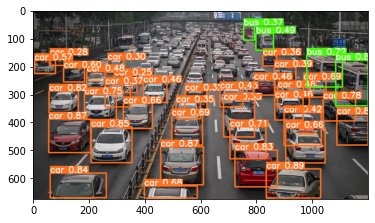

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[ 52,  52,  52],
         [ 42,  42,  42],
         [ 20,  20,  20],
         ...,
         [ 22,  24,  21],
         [ 19,  22,  19],
         [ 18,  21,  18]],
 
        [[ 91,  91,  91],
         [ 75,  75,  75],
         [ 34,  34,  34],
         ...,
         [ 21,  23,  20],
         [ 19,  22,  19],
         [ 19,  22,  19]],
 
        [[ 75,  75,  75],
         [ 88,  88,  88],
         [ 57,  57,  57],
         ...,
         [ 21,  23,  20],
         [ 19,  22,  19],
         [ 18,  21,  18]],
 
        ...,
 
        [[ 42,  42,  42],
         [ 44,  44,  44],
         [ 44,  44,  44],
         ...,
         [128, 121, 121],
         [125, 118, 118],
         [125, 118, 118]],
 
        [[ 42,  42,  42],
         [ 43,  43,  43],
         [ 43,  43,  43],
         ...,
         [124, 120, 119],
         [122, 118, 117],
         [120, 115, 114]],
 
        [[ 42,  42,  42],
         [ 42,  42,  42],
         [ 42,  42,  42],
         ...,
         [123, 119, 118],
  

In [26]:
!python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, entity=None, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-482-gcd35a00 torch 1.9.0+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, f

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-9-29 torch 1.9.0+cu102 CPU




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [28]:
img='/content/yolov5/data/images/IMG_20210922_122540.jpg'

In [29]:
results=model(img)
results.print()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 34853 had too many entries: 9, expected 1
  % (tag, len(values))
image 1/1: 4000x3000 1 Earbuds, 1 Not Earbuds
Speed: 389.9ms pre-process, 359.4ms inference, 2.3ms NMS per image at shape (1, 3, 640, 480)


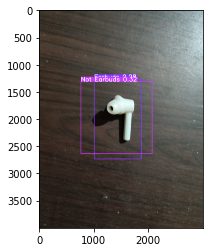

In [30]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()